### Importing Important Modules and Database connectors

In [1]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 KB 855.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 KB 4.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 22.2.0
    Uninstalling attrs-22.2.0:
      Successfully uninstalled attrs-22.2.0


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

### Collecting And Processing Data
* Our main goal is to process the target protien structure `independent variable`
* And predict the `IC50` value the `dependent variable`
* To process the chemical structure Ww will be using `Padel Descripter` later on

In [3]:
target = new_client.target
target_query = target.search('hepatitis')
target_result = pd.DataFrame.from_dict(target_query)

In [4]:
target_result

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Hepatitis A virus cellular receptor 2,14.0,False,CHEMBL4630879,"[{'accession': 'Q8TDQ0', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Hepatitis B virus,Hepatitis B virus,11.0,False,CHEMBL613497,[],ORGANISM,10407
2,[],Hepatitis C virus,Hepatitis C virus,11.0,False,CHEMBL379,[],ORGANISM,11103
3,[],Murine hepatitis virus,Murine hepatitis virus,11.0,False,CHEMBL613733,[],ORGANISM,11138
4,[],Hepatitis A virus,Hepatitis A virus,11.0,False,CHEMBL613753,[],ORGANISM,12092
5,[],Woodchuck hepatitis virus,Woodchuck hepatitis virus,11.0,False,CHEMBL613179,[],ORGANISM,35269
6,[],Hepatitis delta virus,Hepatitis delta virus,11.0,False,CHEMBL4888466,[],ORGANISM,12475
7,"[{'xref_id': 'P26664', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1a (isolate 1) (HCV),Hepatitis C virus polyprotein,10.0,False,CHEMBL4620,"[{'accession': 'P26664', 'component_descriptio...",SINGLE PROTEIN,11104
8,[],Duck hepatitis B virus,Duck hepatitis B virus,10.0,False,CHEMBL613761,[],ORGANISM,12639
9,"[{'xref_id': 'Q15004', 'xref_name': None, 'xre...",Homo sapiens,PCNA-associated factor,10.0,False,CHEMBL5574,"[{'accession': 'Q15004', 'component_descriptio...",SINGLE PROTEIN,9606


In [5]:
selected_target1 = target_result.target_chembl_id[2]
selected_target1

'CHEMBL379'

In [6]:
activity1 = new_client.activity
res = activity1.filter(target_chembl_id=selected_target1).filter(standard_type='IC50')
df1 = pd.DataFrame.from_dict(res)

In [7]:
df1.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,737813,[],CHEMBL691890,Compound was evaluated for inhibition HCV NS5B...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis C virus,Hepatitis C virus,11103,None,None,IC50,uM,UO_0000065,None,None
1,Not Determined,740253,[],CHEMBL872934,Compound was evaluated for inhibition HCV NS5B...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis C virus,Hepatitis C virus,11103,None,None,IC50,uM,UO_0000065,None,None
2,None,1198915,[],CHEMBL687023,Tested for inhibition against Helicase activit...,F,None,None,BAO_0000190,BAO_0000218,...,Hepatitis C virus,Hepatitis C virus,11103,None,None,IC50,uM,UO_0000065,None,500.0


### Only Selecting the required Columns

In [8]:
columns = ['canonical_smiles','molecule_chembl_id','standard_value']

In [9]:
df1_selected = df1[columns]

In [10]:
len(df1_selected)

2650

### Fixing Missing Values
* For that I am using mean() of the column `standard_value`
* For values greater than `100000000` I am going to limit it to `100000000` so after converting to log value it will not show any negative value
* Then we will finally apply to convert all `standard_value` to log of `standard_value` so it will fix high deviation and outliers(most of them atleast)

In [11]:
df1_selected.isnull().sum()

canonical_smiles       1
molecule_chembl_id     0
standard_value        90
dtype: int64

In [12]:
df1_selected['standard_value'].dtype

dtype('O')

In [13]:
df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)

<ipython-input-13-3a9a20ee965c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_selected['standard_value'] = df1_selected['standard_value'].astype(float)


In [14]:
df1_selected['standard_value'].dtype

dtype('float64')

In [15]:
df1_selected['standard_value'].head(3)

0         NaN
1         NaN
2    500000.0
Name: standard_value, dtype: float64

In [16]:
try:
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df1_selected.isnull().sum()

canonical_smiles      1
molecule_chembl_id    0
standard_value        0
dtype: int64

In [18]:
if df1_selected['canonical_smiles'].isnull().sum() > 0:
  df1_selected = df1_selected.dropna(axis=0)

In [19]:
len(df1_selected)

2649

In [20]:
def norm_val(data):
  for i in data['standard_value']:
    if i > 100000000:
      data['standard_value'] = data['standard_value'].replace(i,100000000)
  return data['standard_value']

In [21]:
def convert_log(data):
  pIC50 = []
  for i in data['standard_value']:
    data['standard_value'] = data['standard_value'].replace(i,-np.log10(i*(10**-9)))
  return data['standard_value']

In [22]:
df1_selected.describe()

,standard_value
count,2649.000000
mean,19608.681063
std,68955.467906
min,0.029000
25%,32.000000
50%,460.000000
75%,10000.000000
max,1000000.000000


In [23]:
df1_selected['standard_value'] = norm_val(df1_selected)

In [24]:
df1_selected['standard_value'] = convert_log(df1_selected)

In [25]:
df1_selected['standard_value'].head()

0    8.091947
1    8.091947
2    8.091947
3    8.091947
4    8.091947
Name: standard_value, dtype: float64

In [26]:
df1_selected.isnull().sum()

canonical_smiles      0
molecule_chembl_id    0
standard_value        0
dtype: int64

In [27]:
try:
  df1_selected.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1_selected['standard_value'].fillna(df1_selected['standard_value'].mean(),inplace=True)
except:
  pass

### Creating labels and features

In [28]:
df1_x = df1_selected.drop(columns=['standard_value'],axis=1)
df1_y = df1_selected['standard_value']

In [29]:
len(df1_x),len(df1_y)

(2649, 2649)

In [30]:
df1_x.to_csv('molecule.smi', sep='\t', index=False, header=False)
df1_y.to_csv('hepatitisC_labels.csv',index=False)

### A quick look at files

In [31]:
! ls

hepatitisC_labels.csv  molecule.smi  sample_data


In [32]:
! cat molecule.smi | head -5

Nc1nc(O)c2ncn([C@@H]3O[C@H](CO)[C@@H](O)[C@H]3F)c2n1	CHEMBL308759
C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n1cnc2cncnc21	CHEMBL75343
O=C1NNC(=O)C2C(N=CN2C2O[C@H](CO)[C@@H](O)[C@H]2O)N1	CHEMBL611862
NC1=NC(=O)C2N=CNC2C(=O)N1	CHEMBL336356
NC1=NC(=O)C2N=CNC2C(=O)N1	CHEMBL336356


### Using padel Descriptor to break it into dataset form

In [33]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-03-10 08:23:47--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-10 08:23:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   162MB/s    in 0.2s    

2023-03-10 08:23:48 (162 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-10 08:23:48--  https://github

In [34]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [35]:
! bash padel.sh

Processing CHEMBL75343 in molecule.smi (2/2649). 
Processing CHEMBL308759 in molecule.smi (1/2649). 
Processing CHEMBL336356 in molecule.smi (4/2649). Average speed: 6.80 s/mol.
Processing CHEMBL611862 in molecule.smi (3/2649). Average speed: 6.74 s/mol.
Processing CHEMBL336356 in molecule.smi (5/2649). Average speed: 3.62 s/mol.
Processing CHEMBL2115214 in molecule.smi (6/2649). Average speed: 2.50 s/mol.
Processing CHEMBL2115214 in molecule.smi (7/2649). Average speed: 1.52 s/mol.
Processing CHEMBL134661 in molecule.smi (8/2649). Average speed: 1.37 s/mol.
Processing CHEMBL337909 in molecule.smi (9/2649). Average speed: 1.38 s/mol.
Processing CHEMBL134689 in molecule.smi (10/2649). Average speed: 1.05 s/mol.
Processing CHEMBL336651 in molecule.smi (12/2649). Average speed: 0.91 s/mol.
Processing CHEMBL134689 in molecule.smi (11/2649). Average speed: 0.95 s/mol.
Processing CHEMBL336651 in molecule.smi (13/2649). Average speed: 0.84 s/mol.
Processing CHEMBL2092974 in molecule.smi (14/2

### Model selection and usage

### Importing Modules

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge,OrthogonalMatchingPursuit,LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, KFold , cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

### Using different models and importing processed data 

In [37]:
X = pd.read_csv('descriptors_output.csv')
Y = pd.read_csv('hepatitisC_labels.csv')

In [38]:
len(X),len(Y)

(2649, 2649)

In [39]:
Y['standard_value'].isnull().sum()

0

In [40]:
for i in Y['standard_value']:
  Y['standard_value'] = Y['standard_value'].replace(i,round(i,2))

In [41]:
Y.standard_value.unique()

array([ 8.09,  8.28,  3.35,  8.29,  5.66,  5.84,  5.36,  5.89,  8.26,
        5.97,  4.26,  4.01,  8.35,  8.38,  5.01,  8.27,  5.09,  8.08,
        5.  ,  8.39,  4.31,  4.04,  3.98,  4.21,  8.34,  4.17,  4.03,
        8.36,  3.8 ,  3.57,  6.01,  5.79,  8.22,  5.94,  5.49,  5.9 ,
        8.2 ,  5.13,  5.98,  5.47,  6.65,  6.71,  5.23,  6.37,  8.24,
        6.83,  5.91,  8.23,  6.13,  8.21,  8.15,  5.2 ,  5.81,  8.14,
        6.15,  8.25,  5.28,  6.1 ,  4.9 ,  6.98,  6.32,  7.02,  8.19,
        6.64,  8.17,  6.23,  6.07,  8.31,  4.24,  6.77,  4.56,  6.16,
        6.06,  8.16,  7.17,  5.43,  6.42,  6.99,  7.03,  3.87,  5.06,
        3.88,  8.4 ,  3.77,  8.37,  3.97,  4.16,  5.04,  6.02,  5.16,
        5.32,  5.21,  4.84,  6.81,  6.91,  7.06,  7.05,  6.95,  6.84,
        4.57,  5.64,  4.5 ,  4.1 ,  4.38,  4.49,  4.28,  4.14,  3.74,
        3.19,  4.09,  6.31,  8.33,  8.07,  8.06,  8.32,  4.29,  4.76,
        4.06,  4.71,  3.06,  3.17,  4.02,  9.46,  9.48,  8.18,  5.93,
        5.48,  5.31,

In [42]:
Y.describe()

,standard_value
count,2649.000000
mean,7.747120
std,1.002705
min,3.060000
25%,8.090000
50%,8.090000
75%,8.090000
max,10.540000


In [43]:
Y = Y.to_numpy().ravel()
X = X.drop(columns=['Name'],axis=1)

In [44]:
X.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
Y[:5]

array([8.09, 8.09, 8.09, 8.09, 8.09])

In [46]:
X.shape

(2649, 881)

### Defining all the Regressors

In [47]:
rfe = RandomForestRegressor(n_estimators = 100)
dtree = DecisionTreeRegressor()
svr = SVR()
etree = ExtraTreesRegressor()
lin_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
oth = OrthogonalMatchingPursuit()

In [48]:
def evaluation(y,predictions):
    mae = mean_absolute_error(y,predictions)
    mse = mean_squared_error(y,predictions)
    rmse = np.sqrt(mean_squared_error(y,predictions))
    r2 = r2_score(y,predictions)
    return mae,mse,rmse,r2

### Using different regressors and finding best fit model for our dataset

In [49]:
rmse_arr = []
r2_arr=[]

### Random Forest Tree

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.09016536195984204

Mean Sqaured Error : 0.9169412971242198

Mean Absolute Error : 0.5349542910331752

Root Mean Squared : 0.9575705180947353


### Decision Tree Regressor

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.37075564847964393

Mean Sqaured Error : 1.3814625315482867

Mean Absolute Error : 0.5648626562117138

Root Mean Squared : 1.175356342369533


### Support Vector Regressor

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.00837991935158211

Mean Sqaured Error : 0.999365560496556

Mean Absolute Error : 0.4417967331555726

Root Mean Squared : 0.9996827299181256


### Extra Tree Regression

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
etree.fit(X_train,Y_train)
Y_pred = etree.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.3367745208238284

Mean Sqaured Error : 1.3472159795181453

Mean Absolute Error : 0.5704963219799096

Root Mean Squared : 1.160696333895367


### Lasso Regression

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lasso.fit(X_train,Y_train)
Y_pred = lasso.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
rmse_arr.append(rmse)
r2_arr.append(r2)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -0.0003233573508008014

Mean Sqaured Error : 1.0081368179262624

Mean Absolute Error : 0.6323627912774792

Root Mean Squared : 1.0040601664871793


### Ridge Regression

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
ridge.fit(X_train,Y_train)
Y_pred = ridge.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.07411890871315763

Mean Sqaured Error : 0.9331130881718238

Mean Absolute Error : 0.6304643348999679

Root Mean Squared : 0.9659777886534575


### Orthogonal Matching Pursuit Regressor

In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
oth.fit(X_train,Y_train)
Y_pred = oth.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : 0.1638454598999135

Mean Sqaured Error : 0.8426856887392301

Mean Absolute Error : 0.5918984827519224

Root Mean Squared : 0.9179791330630724


### Linear Regression

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
mae,mse,rmse,r2 = evaluation(Y_test,Y_pred)
r2_arr.append(r2)
rmse_arr.append(rmse)
print("R sqaured value :",r2)
print("")
print("Mean Sqaured Error :",mse)
print("")
print("Mean Absolute Error :",mae)
print("")
print("Root Mean Squared :",rmse)

R sqaured value : -9.920183647675435e+18

Mean Sqaured Error : 9.997669555869889e+18

Mean Absolute Error : 247159889.2642235

Root Mean Squared : 3161909163.127538


### Model Performance

In [58]:
import seaborn as sns

In [59]:
di = {"Name":["Random Forest","Decision Tree","Support Vector","Extra Tree","Lasso","Ridge","Orthogonal","Linear"],
      "RMSE":rmse_arr,"R_Sq":r2_arr}

In [60]:
model_performance = pd.DataFrame.from_dict(di)

In [61]:
model_performance

,Name,RMSE,R_Sq
0,Random Forest,9.575705e-01,9.016536e-02
1,Decision Tree,1.175356e+00,-3.707556e-01
2,Support Vector,9.996827e-01,8.379919e-03
3,Extra Tree,1.160696e+00,-3.367745e-01
4,Lasso,1.004060e+00,-3.233574e-04
5,Ridge,9.659778e-01,7.411891e-02
6,Orthogonal,9.179791e-01,1.638455e-01
7,Linear,3.161909e+09,-9.920184e+18


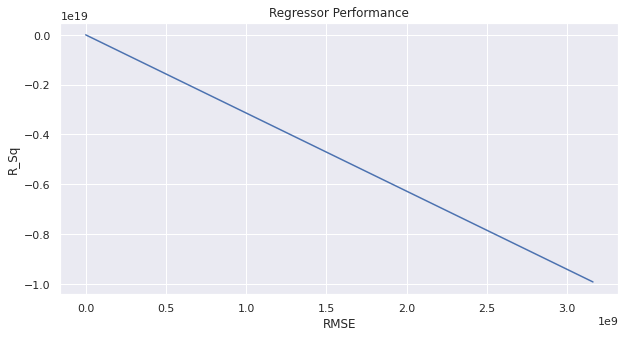

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='RMSE',y='R_Sq',data=model_performance).set(title='Regressor Performance')

### Using model with lowest rmse

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)
rfe.fit(X_train,Y_train)
Y_pred = rfe.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))

In [67]:
rmse

0.9712765231574827

### Saving model state for later use

In [68]:
import pickle

pickle.dump(svr,open("hepatitisC_model.pkl","wb"))